In [138]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:orange">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [139]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
x_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv')

x_test = pd.read_csv('test_x.csv')
y_test = pd.read_csv('test_y.csv')

In [140]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8734, 31), (8734, 1), (2134, 31), (2134, 1))

---

#### **<span style="color:orange">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [141]:
# LinearRegression 코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [142]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [143]:
print(list(x_train))
print(LR.coef_.round(2))
print(LR.intercept_)

['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'month', 'day', 'hour', 'PM10_lag1']
[[-1.603e+02  3.460e+00  1.770e+01  4.927e+01  9.900e-01 -9.000e-02
  -5.100e-01 -2.400e-01  8.000e-02  0.000e+00 -1.700e-01 -9.000e-02
   7.200e-01 -6.500e-01  6.300e-01  1.500e-01  9.600e-01  1.900e-01
  -6.000e-01 -5.000e-02  2.000e-02 -0.000e+00 -2.100e-01  5.900e-01
  -0.000e+00 -9.900e-01  5.100e-01 -5.000e-02  0.000e+00 -3.000e-02
  -2.000e-02]]
[30.53531283]


In [144]:
len(LR.coef_[0])

31

In [145]:
y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.5f}")

Mean Absolute Error: 3.88410
R^2 Score: 0.93573


<BarContainer object of 31 artists>

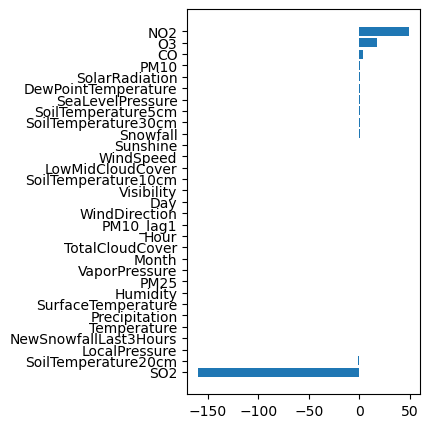

In [158]:
import matplotlib.pyplot as plt

tmp = pd.DataFrame()
tmp['feature'] = list(x_train)
tmp['feature'] =['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'Precipitation',
 'WindSpeed', 'WindDirection', 'Humidity', 'VaporPressure', 'DewPointTemperature',
 'LocalPressure', 'SeaLevelPressure', 'Sunshine', 'SolarRadiation', 'Snowfall',
 'NewSnowfallLast3Hours', 'TotalCloudCover', 'LowMidCloudCover', 'Visibility',
 'SurfaceTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm', 'SoilTemperature20cm',
 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']

tmp['weight'] = LR.coef_[0].round(2)
tmp.sort_values(by='weight', ascending=True, inplace=True)

plt.figure(figsize=(3,5))
plt.barh(y=tmp['feature'], width=tmp['weight']) 

In [159]:
from joblib import dump, load

dump(LR, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

### (시도)

In [96]:
tmp.set_index(keys='feature', inplace=True)
tmp

,weight
feature,
SO2,-163.55
SoilTemperature10cm,-2.09
LocalPressure,-0.70
Temperature,-0.54
Humidity,-0.17
SoilTemperature20cm,-0.16
VaporPressure,-0.11
SurfaceTemperature,-0.10
TotalCloudCover,-0.09


In [109]:
cols = tmp[tmp.abs() > 0.5].dropna()
cols_selected = cols.index.tolist()

In [110]:
x_train.columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'WindSpeed', 'WindDirection', 
                  'Humidity', 'VaporPressure', 'DewPointTemperature', 'LocalPressure', 'SeaLevelPressure', 
                  'TotalCloudCover', 'LowMidCloudCover', 'Visibility', 'SurfaceTemperature', 'SoilTemperature5cm', 
                  'SoilTemperature10cm', 'SoilTemperature20cm', 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']
x_test.columns =  ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'WindSpeed', 'WindDirection', 
                  'Humidity', 'VaporPressure', 'DewPointTemperature', 'LocalPressure', 'SeaLevelPressure', 
                  'TotalCloudCover', 'LowMidCloudCover', 'Visibility', 'SurfaceTemperature', 'SoilTemperature5cm', 
                  'SoilTemperature10cm', 'SoilTemperature20cm', 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']
x_train_selected = x_train[cols_selected]
x_test_selected = x_test[cols_selected]

LR2 = LinearRegression()
LR2.fit(x_train_selected, y_train)

print(list(x_train_selected))
print(LR2.coef_.round(2))
print(LR2.intercept_)

y_pred = LR2.predict(x_test_selected)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.5f}")

['SO2', 'SoilTemperature10cm', 'LocalPressure', 'Temperature', 'SeaLevelPressure', 'DewPointTemperature', 'PM10', 'SoilTemperature5cm', 'CO', 'O3', 'NO2']
[[-2.6136e+02 -1.1000e+00  7.4000e-01 -1.7000e-01 -7.4000e-01  9.0000e-02
   9.8000e-01  1.1200e+00  1.7000e+00  1.4340e+01  3.0370e+01]]
[7.58964567]
Mean Absolute Error: 3.88279
R^2 Score: 0.93338


- test 데이터셋으로 최종평가

In [ ]:
x_test.columns =  ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'WindSpeed', 'WindDirection', 
                  'Humidity', 'VaporPressure', 'DewPointTemperature', 'LocalPressure', 'SeaLevelPressure', 
                  'TotalCloudCover', 'LowMidCloudCover', 'Visibility', 'SurfaceTemperature', 'SoilTemperature5cm', 
                  'SoilTemperature10cm', 'SoilTemperature20cm', 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']

In [6]:
# 학습한 모델을 pkl 파일로 저장해보세요.




# [Step 4] 머신러닝 모델링2

#### **<span style="color:orange">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [147]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [148]:
# Test 데이터로 성능을 평가해보세요.
y_pred = RF.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.5f}")

Mean Absolute Error: 3.96177
R^2 Score: 0.93039


Feature Importances:
[8.38977689e-04 1.32908877e-03 9.57358200e-04 1.00329723e-03
 9.18347558e-01 1.28352203e-02 1.07004504e-03 3.35865746e-02
 1.23694859e-03 5.58044212e-04 3.09877776e-03 5.76970764e-04
 5.98157242e-04 2.40240411e-03 3.08256015e-03 3.07988879e-04
 1.16162951e-03 1.99382086e-04 2.07783397e-04 3.80619620e-04
 3.12157435e-04 5.00305325e-03 6.91351547e-04 4.96403657e-04
 5.57334187e-04 1.33285060e-03 3.58720202e-03 2.17696961e-04
 6.86172136e-04 1.48333780e-03 1.85305386e-03]


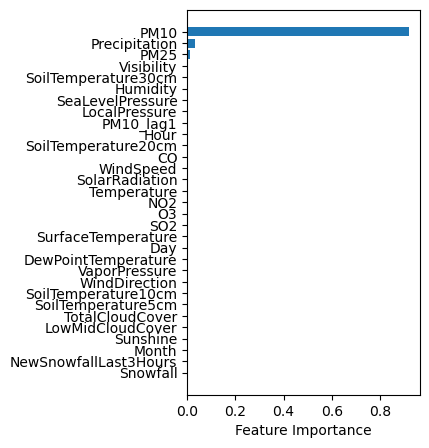

In [160]:
print("Feature Importances:")
print(RF.feature_importances_)

tmp = pd.DataFrame()
tmp['feature'] = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'Precipitation',
 'WindSpeed', 'WindDirection', 'Humidity', 'VaporPressure', 'DewPointTemperature',
 'LocalPressure', 'SeaLevelPressure', 'Sunshine', 'SolarRadiation', 'Snowfall',
 'NewSnowfallLast3Hours', 'TotalCloudCover', 'LowMidCloudCover', 'Visibility',
 'SurfaceTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm', 'SoilTemperature20cm',
 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']

tmp['weight'] = RF.feature_importances_
tmp.sort_values(by='weight', ascending=True, inplace=True)

plt.figure(figsize=(3,5))
plt.barh(y=tmp['feature'], width=tmp['weight'])
plt.xlabel('Feature Importance')
plt.show()

In [119]:
tmp

,feature,weight
22,Month,0.000278
8,WindDirection,0.000542
18,SoilTemperature5cm,0.000596
14,TotalCloudCover,0.000597
15,LowMidCloudCover,0.000688
10,VaporPressure,0.000723
1,CO,0.000801
19,SoilTemperature10cm,0.000808
0,SO2,0.000846
11,DewPointTemperature,0.000875


In [118]:
# 학습한 모델을 파일로 저장해보세요.
dump(RF, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [11]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:orange">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [150]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)

GradientBoostingRegressor()

In [151]:
# Test 데이터로 성능을 평가해보세요.
y_pred = GB.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.5f}")

Mean Absolute Error: 3.77561
R^2 Score: 0.93714


Feature Importances:
[1.23264073e-04 5.96678384e-04 1.81753514e-04 2.14862667e-04
 9.14142154e-01 1.04657495e-02 1.44837871e-05 5.74821378e-02
 2.85394803e-04 1.38370656e-04 2.08359013e-03 1.08999126e-04
 2.05320842e-05 5.65378213e-03 9.36113105e-04 1.18119795e-06
 4.13538035e-04 5.24994231e-06 4.29391570e-05 8.63878711e-05
 2.00983705e-07 5.19492411e-03 3.05621323e-04 1.57662610e-04
 7.86939484e-05 2.83038676e-05 2.29019411e-04 7.18752419e-05
 1.48767799e-04 1.58358644e-04 6.29410432e-04]


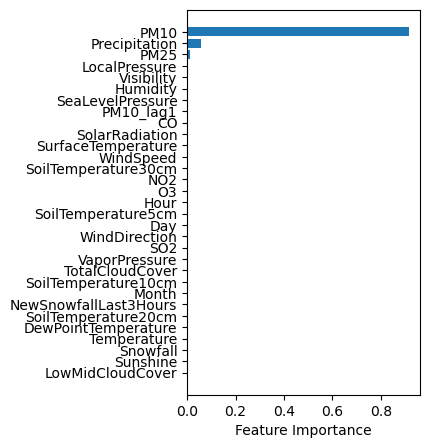

In [161]:
print("Feature Importances:")
print(GB.feature_importances_)

tmp = pd.DataFrame()
tmp['feature'] = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'Precipitation',
 'WindSpeed', 'WindDirection', 'Humidity', 'VaporPressure', 'DewPointTemperature',
 'LocalPressure', 'SeaLevelPressure', 'Sunshine', 'SolarRadiation', 'Snowfall',
 'NewSnowfallLast3Hours', 'TotalCloudCover', 'LowMidCloudCover', 'Visibility',
 'SurfaceTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm', 'SoilTemperature20cm',
 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']

tmp['weight'] = GB.feature_importances_
tmp.sort_values(by='weight', ascending=True, inplace=True)

plt.figure(figsize=(3,5))
plt.barh(y=tmp['feature'], width=tmp['weight'])
plt.xlabel('Feature Importance')
plt.show()

In [130]:
tmp

,feature,weight
6,Temperature,0.000023
15,LowMidCloudCover,0.000030
11,DewPointTemperature,0.000045
10,VaporPressure,0.000056
18,SoilTemperature5cm,0.000065
22,Month,0.000070
0,SO2,0.000075
14,TotalCloudCover,0.000095
8,WindDirection,0.000098
19,SoilTemperature10cm,0.000138


In [124]:
# 학습한 모델을 파일로 저장해보세요.
dump(GB, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [16]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:orange">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [153]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()
lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5063
[LightGBM] [Info] Number of data points in the train set: 8734, number of used features: 31
[LightGBM] [Info] Start training from score 38.799634


LGBMRegressor()

In [154]:
# Test 데이터로 성능을 평가해보세요.
y_pred = lgbm.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.5f}")

Mean Absolute Error: 3.72502
R^2 Score: 0.93979


Feature Importances:
[ 20  50  84 113 759 265  64 110 132  74 121  42  14  79  46  24 115  22
  20  35  24 282  49  25  19  26  52  19  37 156 122]


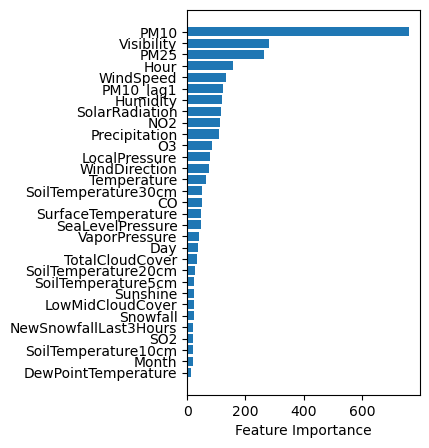

In [162]:
# Feature의 중요도 확인
print("Feature Importances:")
print(lgbm.feature_importances_)

tmp = pd.DataFrame()
tmp['feature'] = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'Temperature', 'Precipitation',
 'WindSpeed', 'WindDirection', 'Humidity', 'VaporPressure', 'DewPointTemperature',
 'LocalPressure', 'SeaLevelPressure', 'Sunshine', 'SolarRadiation', 'Snowfall',
 'NewSnowfallLast3Hours', 'TotalCloudCover', 'LowMidCloudCover', 'Visibility',
 'SurfaceTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm', 'SoilTemperature20cm',
 'SoilTemperature30cm', 'Month', 'Day', 'Hour', 'PM10_lag1']

tmp['weight'] = lgbm.feature_importances_
tmp.sort_values(by='weight', ascending=True, inplace=True)

plt.figure(figsize=(3,5))
plt.barh(y=tmp['feature'], width=tmp['weight'])
plt.xlabel('Feature Importance')
plt.show()

In [128]:
# 학습한 모델을 파일로 저장해보세요.
dump(lgbm, 'light_gradient_model.joblib')

['light_gradient_model.joblib']

#### **<span style="color:orange">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

In [136]:
import warnings
warnings.filterwarnings("ignore")

In [137]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    # 'n_estimators': [20, 50, 100, 200],
    # 'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 10],
    # 'num_leaves': [31, 50, 100]
}

grid = GridSearchCV(lgb.LGBMRegressor(), param_grid, cv=3)
grid.fit(x_train, y_train) 

print(model.best_params_)
print(model.best_score_)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3815
[LightGBM] [Info] Number of data points in the train set: 5822, number of used features: 26
[LightGBM] [Info] Start training from score 39.203624
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3578
[LightGBM] [Info] Number of data points in the train set: 5823, number of used features: 26
[LightGBM] [Info] Start training from score 29.929246
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3775
[LightGBM] [Info] Number of data points in the train set: 5823, number of used features: 26
[LightGBM] [Info] S